In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')      #reading the fits file of subset of gaia astrometric data
dr3stars.info()                                         #viewing the header to have an idea of data structure


Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
print(dr3stars[1].columns)                          #viewing the names of the columns of the data and their units

ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 73
    name = 'DEdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 84
    name = 'e_DEdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 97
    name = 'GLON'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 108
    name = 'GLAT'; format = 'E11.4'; unit = 'deg'; disp = 'E11.4'; start = 121
    name = 'pmRA'; format = 'E11.4'; unit = 'mas/yr'; disp = 'E11.4'; start = 133
    name = 'e_pmRA'; format = 'F10.8'; unit = 'mas/yr'; disp = 'F10.8'; start = 145
    name = 'pmDE'; format = 'E11.4'; unit = 'mas/yr'; d

In [4]:
stars = pd.DataFrame(dr3stars[1].data)         #assigning table to the stars info

In [5]:
print(stars.columns)                           #seeing the columns of the stars

Index(['Name', 'ID', 'GaiaDR3', 'inrt', 'Prob', 'RAdeg', 'e_RAdeg', 'DEdeg',
       'e_DEdeg', 'GLON', 'GLAT', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx',
       'e_Plx', 'pscol', 'e_pscol', 'PlxpmRACor', 'PlxpmDECor', 'pmRApmDECor',
       'PlxpscolCor', 'pmRApscolCor', 'pmDEpscolCor', 'Solved', 'ELAT',
       'nueff', 'RUWE', 'FidelityV1', 'FG', 'e_FG', 'FBP', 'e_FBP', 'FRP',
       'e_FRP', 'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'BP-G', 'G-RP', 'RV',
       'e_RV', 'n_RV', 'o_RV', 'o_RVd', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag',
       'Vbroad', 'e_Vbroad', 'o_Vbroad', 'VarFlag', 'NSS', 'RVS'],
      dtype='object')


In [6]:
stars['Name'] = stars['Name'].str.strip()     #removing the white spaces

In [7]:
clcounts = stars.groupby(['Name']).size().reset_index(name='count') #resetting the indices to make our lives easier

In [8]:
print(clcounts)

                 Name  count
0            1636-283     38
1           ADS_16795     41
2     AH03_J0748+26.9     68
3            ASCC_100     87
4            ASCC_101    224
...               ...    ...
7162      vdBergh_152     25
7163       vdBergh_80     93
7164       vdBergh_83     92
7165       vdBergh_85    105
7166       vdBergh_92    345

[7167 rows x 2 columns]


### Question 1.
### In this part I am going to make the scatter plot of 4 random clusters drawn from the populations of the 7167 clusters available in the provided data. There are five parameters that we use to scatter plot: Plx, pmRA, pmDE, Gmag, BP-RP. I split the stars of each cluster in two subsamples: one subsample include the stars that have 80 percent and more probablity to belong to the cluster and the other sample is the ones that have less than 80 percent probablity to belong the the cluster, then I look at how each of the stated parameter scatter, and will comment on that. 

In [9]:
stars_1000 = clcounts.Name[clcounts['count']>1000]      #filtering the population of the clusters that are more than 1000
my_sample = stars_1000.sample(n=4)                      #sampling 4 random  out of our clusters


### as suggested by the assignment, I used the 'sample' method to draw a random name out of the population of the cluster. This means every time you run, you will get 4 new names. So, in order to prevent that, I will stick to the 4 names I have drawn from my own run, as stated below:

In [10]:
NAME = ['Melotte_22','NGC_7654','NGC_6541','NGC_2682']

In [11]:
new = my_sample.reset_index(name='name')            #reseting the indicies to make life easier

In [12]:
# here I filter the 4 selected clusters in two subsamples based on how large the Prob is 
for i in range(len(new)):
    vars()['group_more_' +str(i)] = stars[(stars.Name==NAME[i]) & (stars.Prob>0.8000)]
    vars()['group_less_' +str(i)] = stars[(stars.Name==NAME[i]) & (stars.Prob<0.8000)]

In [13]:
# Following the instruction provided in 'Extras', I stack the columns I need, to be able to read them easier
# when I am planning to plot the scatter-plot. G_more is stacked columns for Prob>0.8, and G_less for Prob<0.8

for i in range(len(new)):

    vars()['G_more' + str(i)] = np.column_stack((vars()['group_more_' +str(i)].RAdeg,
                                                 vars()['group_more_' +str(i)].DEdeg,
                                                 vars()['group_more_' +str(i)].Plx,
                                                 vars()['group_more_' +str(i)].pmRA,
                                                 vars()['group_more_' +str(i)].pmDE))
                                                
    vars()['G_less' + str(i)] = np.column_stack((vars()['group_less_' +str(i)].RAdeg,
                                                 vars()['group_less_' +str(i)].DEdeg,
                                                 vars()['group_less_' +str(i)].Plx,
                                                 vars()['group_less_' +str(i)].pmRA,
                                                 vars()['group_less_' +str(i)].pmDE))    


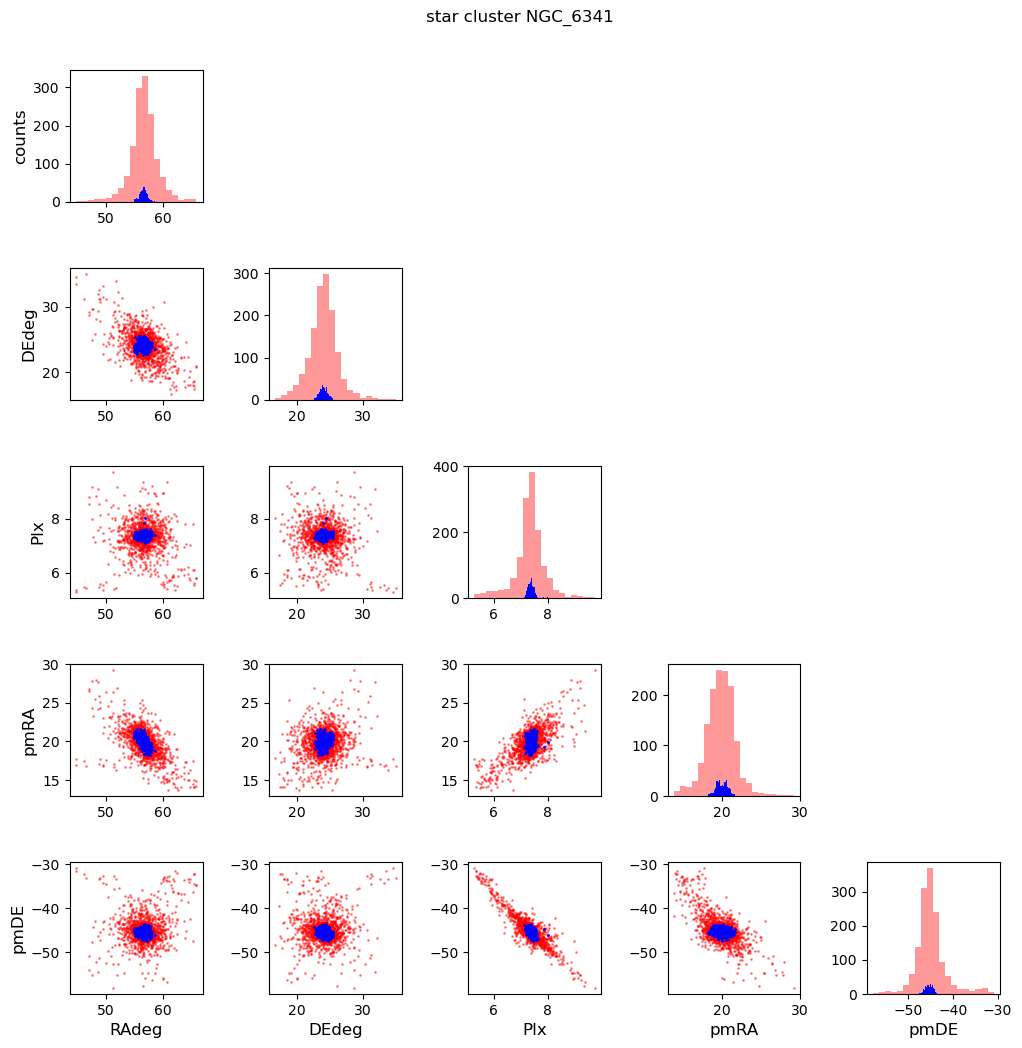

In [14]:
# Scatter-Plot

ndims=5    # number of the variables

labels = ['RAdeg','DEdeg','Plx', 'pmRA','pmDE']
fig, axes = plt.subplots(ndims,ndims,figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=0.5)

for n in range(1):
    for i in range(ndims): ## y dimension
        for j in range(ndims): ## x dimension
            if i == j:
                axes[i,j].hist(vars()['G_more' + str(n)][:,i], bins=20, color='blue', zorder=10)
                axes[i,j].hist(vars()['G_less' + str(n)][:,i], bins=20, color='red',alpha=0.4)
            elif i > j:
                axes[i,j].scatter(vars()['G_more' + str(n)][:,j],vars()['G_more' + str(n)][:,i],s=1, color='blue', zorder=10)
                axes[i,j].scatter(vars()['G_less' + str(n)][:,j],vars()['G_less' + str(n)][:,i],s=1, color='red',alpha=0.4)

            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)
                
fig.suptitle('star cluster {}'.format(new.name[0]),y=0.93)
plt.show()


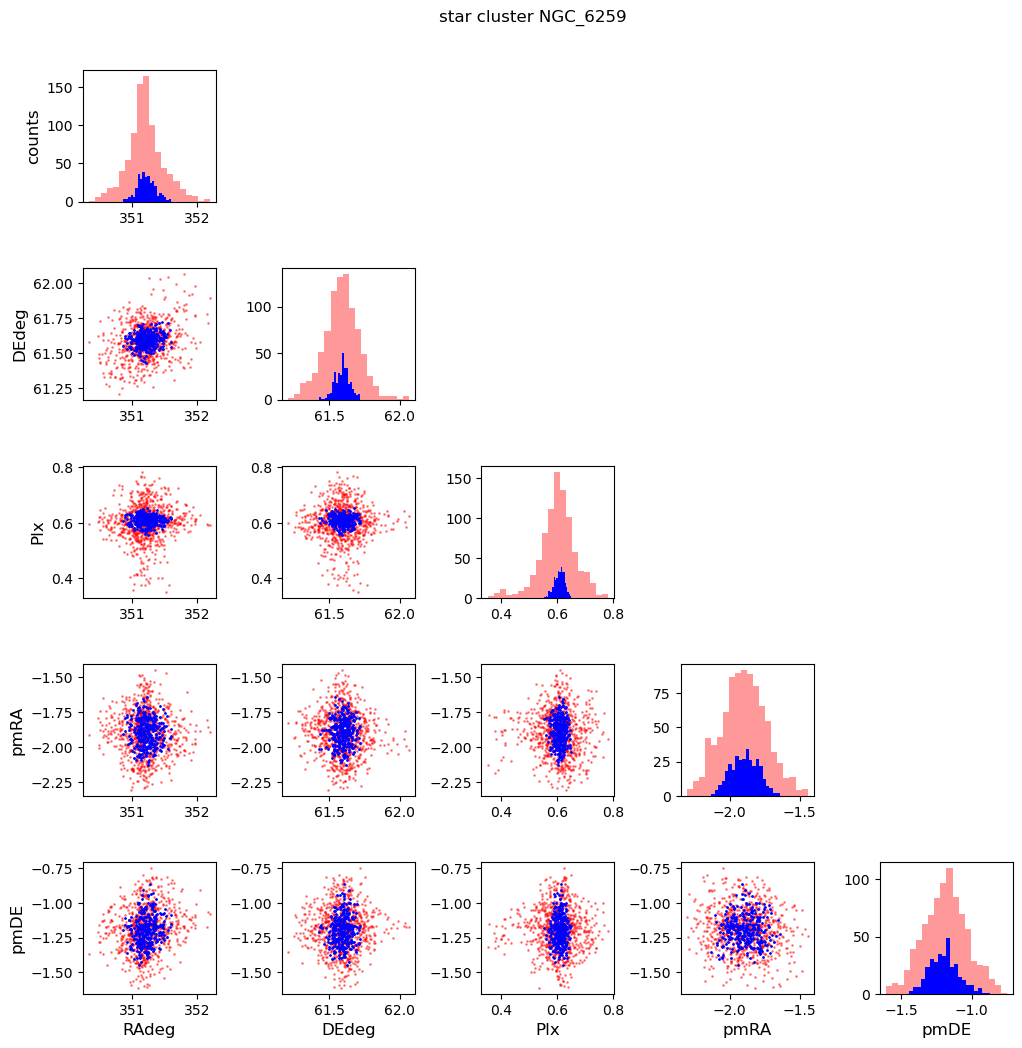

In [15]:
ndims=5
labels = ['RAdeg','DEdeg','Plx', 'pmRA','pmDE']
fig, axes = plt.subplots(ndims,ndims,figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=0.5)

for n in range(1,2):
    for i in range(ndims): ## y dimension
        for j in range(ndims): ## x dimension
            if i == j:
                axes[i,j].hist(vars()['G_more' + str(n)][:,i], bins=20, color='blue',zorder=10)
                axes[i,j].hist(vars()['G_less' + str(n)][:,i], bins=20, color='red',alpha=0.4)
            elif i > j:
                axes[i,j].scatter(vars()['G_more' + str(n)][:,j],vars()['G_more' + str(n)][:,i],s=1, color='blue',zorder=10)
                axes[i,j].scatter(vars()['G_less' + str(n)][:,j],vars()['G_less' + str(n)][:,i],s=1, color='red',alpha=0.4)

            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)
                
fig.suptitle('star cluster {}'.format(new.name[1]),y=0.93)
plt.show()


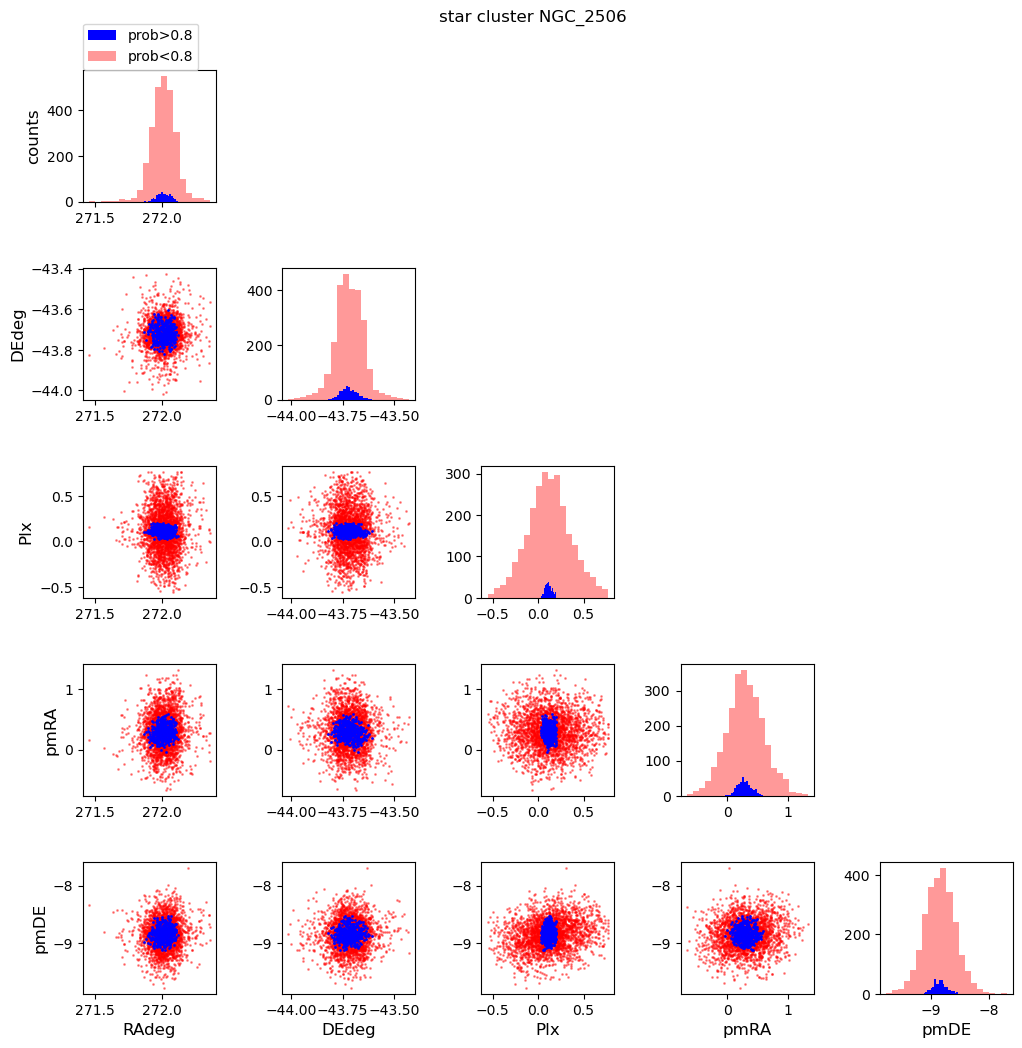

In [16]:
ndims=5
labels = ['RAdeg','DEdeg','Plx', 'pmRA','pmDE']
fig, axes = plt.subplots(ndims,ndims,figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=0.5)

for n in range(2,3):
    for i in range(ndims): ## y dimension
        for j in range(ndims): ## x dimension
            if i == j:
                axes[i,j].hist(vars()['G_more' + str(n)][:,i], bins=20, color='blue',zorder=10, label='prob>0.8')
                axes[i,j].hist(vars()['G_less' + str(n)][:,i], bins=20, color='red',alpha=0.4, label = 'prob<0.8')
            elif i > j:
                axes[i,j].scatter(vars()['G_more' + str(n)][:,j],vars()['G_more' + str(n)][:,i],s=1, color='blue',zorder=10)
                axes[i,j].scatter(vars()['G_less' + str(n)][:,j],vars()['G_less' + str(n)][:,i],s=1, color='red',alpha=0.4)

            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)
                
axes[0,0].legend(loc=(0,1))
fig.suptitle('star cluster {}'.format(new.name[2]),y=0.93)
plt.show()


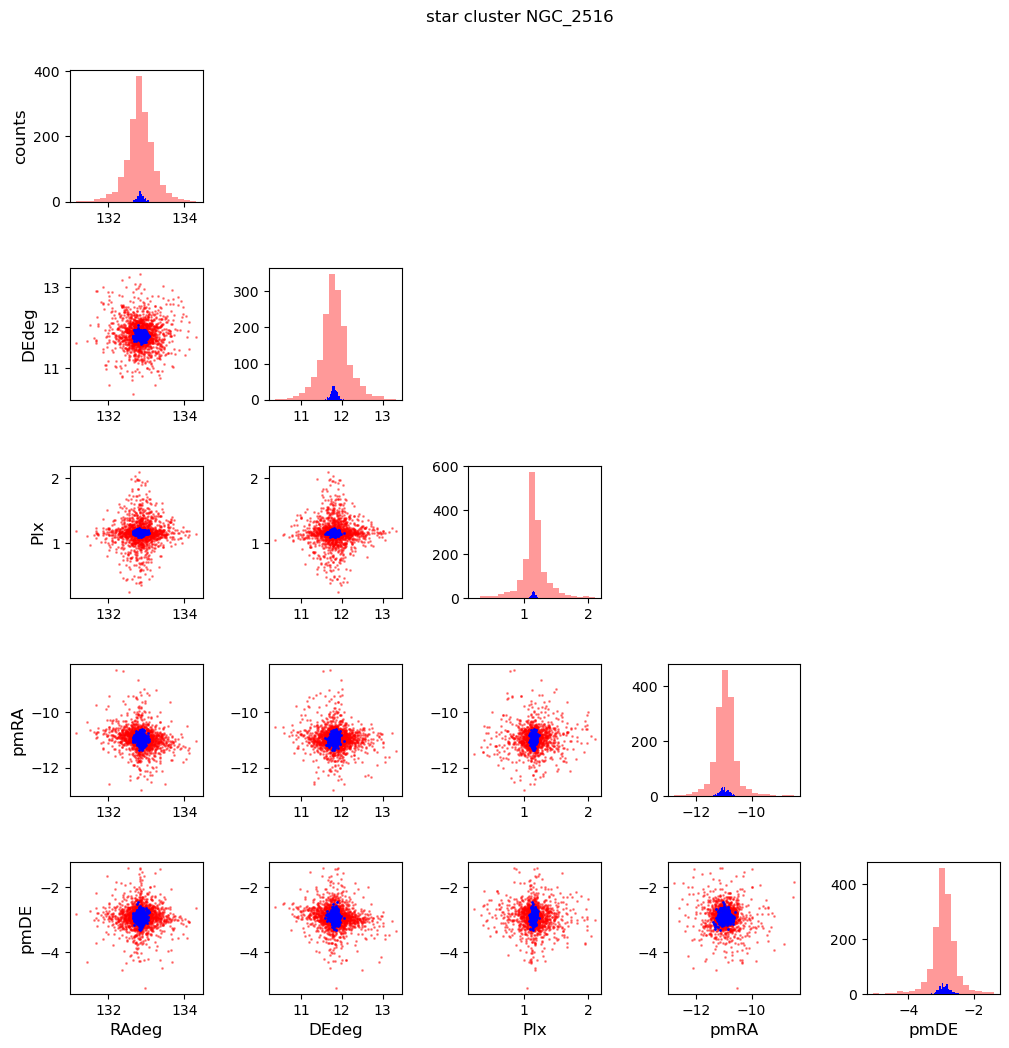

In [17]:
ndims=5
labels = ['RAdeg','DEdeg','Plx', 'pmRA','pmDE']
fig, axes = plt.subplots(ndims,ndims,figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=0.5)

for n in range(3,4):
    for i in range(ndims): ## y dimension
        for j in range(ndims): ## x dimension
            if i == j:
                axes[i,j].hist(vars()['G_more' + str(n)][:,i], bins=20, color='blue',zorder=10)
                axes[i,j].hist(vars()['G_less' + str(n)][:,i], bins=20, color='red',alpha=0.4)
            elif i > j:
                axes[i,j].scatter(vars()['G_more' + str(n)][:,j],vars()['G_more' + str(n)][:,i],s=1, color='blue',zorder=10)
                axes[i,j].scatter(vars()['G_less' + str(n)][:,j],vars()['G_less' + str(n)][:,i],s=1, color='red',alpha=0.4)

            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)
                
fig.suptitle('star cluster {}'.format(new.name[3]),y=0.93)
plt.show()


### This makes sense ofcourse. The red results belong to the stars with less probablity of belonging to a cluster, that is why they are more scattered, and have higher populations. When we increase the threshold of the probaility to more than 80 % we see that the population becomes less scattered and less crowded at the same time

### Question 2. RA vs DEC on five parameters 

### In this question we want to see how the parameters of stars in a cluster are dpendant on spatial dimension, namely RA, and DE. So we split the stars of the cluster into subsamples: once based on whether the their RA is larger or smaller than the RA_mean, and second, based on whether their DE is larger or smaller than the DE_mean. Then we run a t-test on each of the two subsamples, while making sure that the subsamples do not violate the assumptions of the t-test, which are: 1) the subsamples have the same variances, 2) the mean of the subsamples are normally distributed. The latter can be check via 1) the subsample itself is normally distributed, 2) the number of the data point are large enough that we can rely on the central limit theorem.

In [18]:
# here we only focus on the set of stars that have high probability of belonging to a cluster P>0.8,
# then we group the stars by the name of their clusters and see what is the population of each cluster
# we then derive the standard deviation on RA and DEC, adding them to the cluster data frame
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

### 2.a) ###

In [19]:
# new cluster sample containing only clusters with > 200 stars 
# and standard deviations of RA and Dec < 0.1°

new_cluster = clusters_hiprob[(clusters_hiprob['count']>200) & (clusters_hiprob['sd_RAdeg'] <0.1) &
                             (clusters_hiprob['sd_DEdeg'] <0.1)]

In [20]:
print('How many star clusters are left: ',len(new_cluster.Name))

How many star clusters are left:  85


In [21]:
# selecting a random cluster from the new_cluster sample

my_cluster = new_cluster.sample(n=1) 

cluster_name = my_cluster['Name'].iloc[0]


### since everytime you run the code above, you get a new name, I stick to one name that was drawned in my own run

In [22]:
cluster_name = 'FSR_1758'

In [23]:
def con(cluster_name):
    '''This function takes the cluster name as an input,
       caluclates the RA and DEC mean of each cluster,
       then divide the stars within a cluster in compared to RA and DEC mean,
       it returns 4 subsamples: the first two subsamples are stars splitted based on RAmean,
       the second two subsamples are the stars splitted by DEmean'''
    
    RAmean = stars_hiprob[stars_hiprob['Name']==cluster_name].RAdeg.mean()
    DEmean = stars_hiprob[stars_hiprob['Name']==cluster_name].DEdeg.mean()
    my_cluster_RA_more = stars_hiprob[(stars_hiprob['Name']==cluster_name) & (stars_hiprob['RAdeg']>RAmean)]
    my_cluster_RA_less = stars_hiprob[(stars_hiprob['Name']==cluster_name) & (stars_hiprob['RAdeg']<RAmean)]
    my_cluster_DE_more = stars_hiprob[(stars_hiprob['Name']==cluster_name) & (stars_hiprob['DEdeg']>DEmean)]
    my_cluster_DE_less = stars_hiprob[(stars_hiprob['Name']==cluster_name) & (stars_hiprob['DEdeg']<DEmean)]
    
    return my_cluster_RA_more,my_cluster_RA_less,my_cluster_DE_more,my_cluster_DE_less
    

In [24]:
my_cluster_RA_more = con('FSR_1758')[0]
my_cluster_RA_less = con('FSR_1758')[1]
my_cluster_DE_more = con('FSR_1758')[2]
my_cluster_DE_less = con('FSR_1758')[3]

In [25]:
print('This is the number of stars with RA > RAmean: ',len(my_cluster_RA_more['Plx']))
print('This is the number of stars with RA < RAmean: ', len(my_cluster_RA_less['Plx']))

print('This is the number of stars with DE > DEmean: ',len(my_cluster_DE_more['Plx']))
print('This is the number of stars with DE < DEmean: ', len(my_cluster_DE_less['Plx']))

This is the number of stars with RA > RAmean:  118
This is the number of stars with RA < RAmean:  115
This is the number of stars with DE > DEmean:  107
This is the number of stars with DE < DEmean:  126


### the above shows the size of our subsamples, that is not very large. That means, when we are checking the assumption of our t-test, where the mean of the subsamples should be normally distributed, we cannot rely on the number of the sample because they are too low to be sure of the central limit theorem effect. Therfore, it is better to also look at the shape of the histogram, and find those that are skewed to either side, those data samples are not appropriate for t-test. 

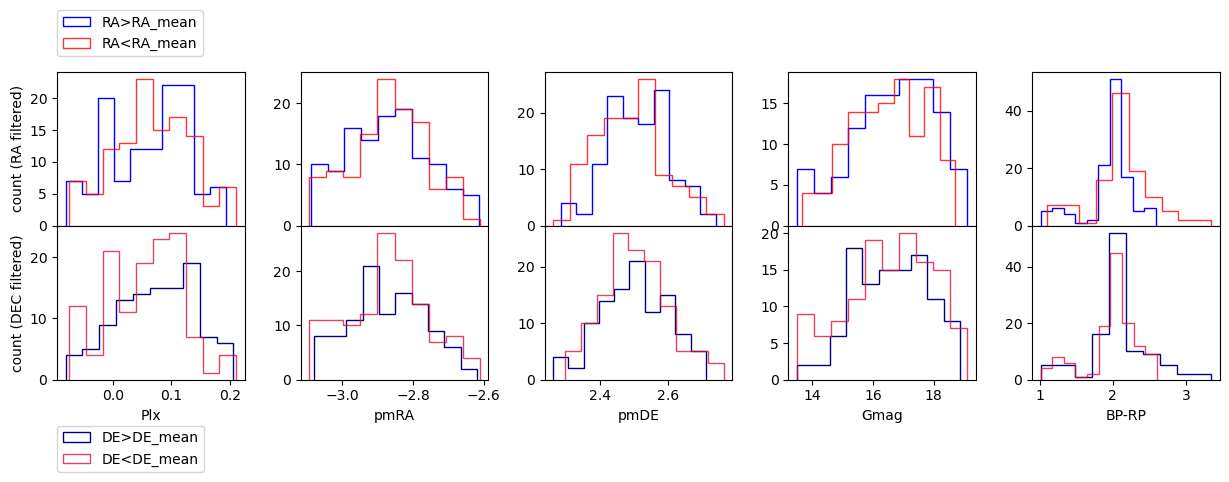

In [26]:
dims=5
fig, axes = plt.subplots(2,5,figsize=(15,4))
fig.subplots_adjust(wspace=0.3,hspace=0)

param = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']


for i in range(dims):
    axes[0,i].hist(my_cluster_RA_more[param[i]],histtype='step',color='blue',label='RA>RA_mean')
    axes[0,i].hist(my_cluster_RA_less[param[i]],histtype='step',color='red',alpha=0.8, label='RA<RA_mean')
    axes[0,0].legend(loc=(0,1.1))
    axes[1,i].hist(my_cluster_DE_more[param[i]],histtype='step',color='navy',label='DE>DE_mean')
    axes[1,i].hist(my_cluster_DE_less[param[i]],histtype='step',color='crimson',alpha=0.8,label='DE<DE_mean')
    axes[1,i].set_xlabel(param[i])
    axes[0,i].set_xticks([])
    axes[1,0].legend(loc=(0,-0.6))

    
axes[0,0].set_ylabel('count (RA filtered)')
axes[1,0].set_ylabel('count (DEC filtered)')

show()

### is t-test appropriate to test all the pair of subsamples? the answer is No. In order to have a reliable t-test we need to make sure that our subsamples satisfy the two assumptions: the subsample means are normally distributed and the vairances of target subsamples are the same. Now, looking at the above histogram, we can see that high values of Plx data points of DE subsamples is skewed toward the right, which makes it inappropriate for the test, similiar behavior can be seen for the pmRA of the DE subsamples, we see the the blue histogram is leaning towards the left. The Gmag data points of the RA subsamples (first row, 4th frame from the left) seems to be leaning towards the right, so the asumptions of t-test is shaky on these subsamples, this means we shall not rely on the test for these specific parameters. The rest seem to somewhat following a normal distrbution which then implies a mean that is also drawn from a noramal distrbution. We can also see that for almost all the pair of subsamples variances are roughly the same, however I will later quntify the differences. 

### 2b) ###

In [27]:
import scipy.stats

def tt(cluster_name):
    '''input: the string name of the cluster we want to analyse
       the function takes the name of the cluster finds its stars and its physical properties,
       indicated as "param" which includes: Plx, pmRA, pmDE, Gmag, BP-RP.
       the function runs the t-test on all the parameters, and store their p-values, in order, in a 
       a list. Since we have two series of sunsample per parameters splitted based on their RAmean, DEmean,
       the output would be the two lists of p-values of each parameter per each spatial dimension'''
    
    tt_RA = []
    tt_DE = []

    var_RA = []
    var_DE = []
    my_cluster_RA_more = con(cluster_name)[0]
    my_cluster_RA_less = con(cluster_name)[1]
    my_cluster_DE_more = con(cluster_name)[2]
    my_cluster_DE_less = con(cluster_name)[3]
    
    for i in range(dims):
    
        a = my_cluster_RA_more[param[i]]
        b = my_cluster_RA_less[param[i]]
        c = my_cluster_DE_more[param[i]]
        d = my_cluster_DE_less[param[i]]
    
        var_RA.append(np.abs(np.var(a)-np.var(b)))
        var_DE.append(np.abs(np.var(c)-np.var(d)))
    
        ttra = scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None,
                      random_state=None, alternative='two-sided', trim=0, keepdims=False)[1]
        tt_RA.append(ttra)
    
        ttde = scipy.stats.ttest_ind(c, d, axis=0, equal_var=True, nan_policy='propagate', permutations=None,
                      random_state=None, alternative='two-sided', trim=0, keepdims=False)[1]
        tt_DE.append(ttde)
        
    return tt_RA, tt_DE, var_RA, var_DE
    

In [28]:
print(param)
print('-----------------------------------------')
print('* t-test p-values for two samples seperated by mean RA')
print(tt('FSR_1758')[0])
print()
print('* t-test p-values for two samples seperated by mean DE')
print(tt('FSR_1758')[1])
print()
print('the variance differences of two samples of RA')
print(tt('FSR_1758')[2])
print()

print('the variance differences of two samples of DE')
print(tt('FSR_1758')[3])

['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
-----------------------------------------
* t-test p-values for two samples seperated by mean RA
[0.7005177654451407, 0.8409079114651816, 0.13597361994420315, 0.37671140821770954, 0.00133603403764434]

* t-test p-values for two samples seperated by mean DE
[0.02389465436105092, 0.9254846256960152, 0.9950992876279171, 0.7238204488956874, 0.04773605960127272]

the variance differences of two samples of RA
[0.00015236506407042844, 0.002314856121977845, 0.0016354733766506709, 0.28758690911620777, 0.0563515649976242]

the variance differences of two samples of DE
[0.00011632705801861883, 0.0016392444694042288, 0.0008058526518988415, 0.4849871446109677, 0.03696773063303664]


### It is important to note that the cluster name could be random generated, but I fixed on the cluster 'FSR_1758', and interpreted its results, otherwise if you'd run my script you will see different numbers for a different cluster which would not match my descritption. So, for cluster 'FSR_1758', We have carried out t-test for five parameters, and reported our p-values in the above section. The assunptions of the t-test is twofolds: 1) the means of the two samples are normally distributed, 2) the variance of the two samples are the same. The null hypothesis is that the two subsamples that we are testing have the same mean. So the p-value that we have tells us how valid this hypothesis is. As we can see for the case of RA, the P-value for the pmRA subsamples is the highest with 0.8409 which is a little over $1\sigma$ significance. This value is not enough to approve the hypothesis but we also cannot reject it, it means that there is not enough evidence to tell that two subsamples are not drawn from the same population. Similiraly, we can have the same conclusion about the p-values of Plx, Gmag, and pmDE. However, the p-value for the BP-RP is very low, hiniting towards the idea that the the subsamples of RA might be from different populations. This p-values is 0.0013360 which is equivalant of slightly more than  $3\sigma$ significane, which is good threshold to reject the hypothesis, therefore we can conclude that the two subsamples of BP-RP, are not drawn from the same population, this implies that the spectra is dependant on RA, or another words, it is spatial dependant. 


### the highest p-value for the Declination subsamples belong to the pmDE parameter, the 0.9950 which is slightly short of $3\sigma$ (0.9973). Knowing how close it is to the threshold, we decide to accept the hypothesis, meaning that the two subsamples of proper motion DE, are drawn from the same population with same mean, this implies the DEmean parameter does have any significane on the DEC proper motion. The other p-values of other four parameters are not significant, meaning that the evidence is not enough to either reject or accept the null hypothesis 

### since one of the assumptions of the t-test is that two subsamples that are being tested, have the same variance, I calculated the variances of the subsamples for all the paramters of both cases, as we can see the assumption holds. ###

### 2c) repeat the above analysis for two more clusters

In [29]:
sc1 = 'NGC_6231'
sc2 = 'NGC_7089'

In [30]:
my_sc1_RA_more = con(sc1)[0]
my_sc1_RA_less = con(sc1)[1]
my_sc1_DE_more = con(sc1)[2]
my_sc1_DE_less = con(sc1)[3]

my_sc2_RA_more = con(sc2 )[0]
my_sc2_RA_less = con(sc2 )[1]
my_sc2_DE_more = con(sc2 )[2]
my_sc2_DE_less = con(sc2 )[3]

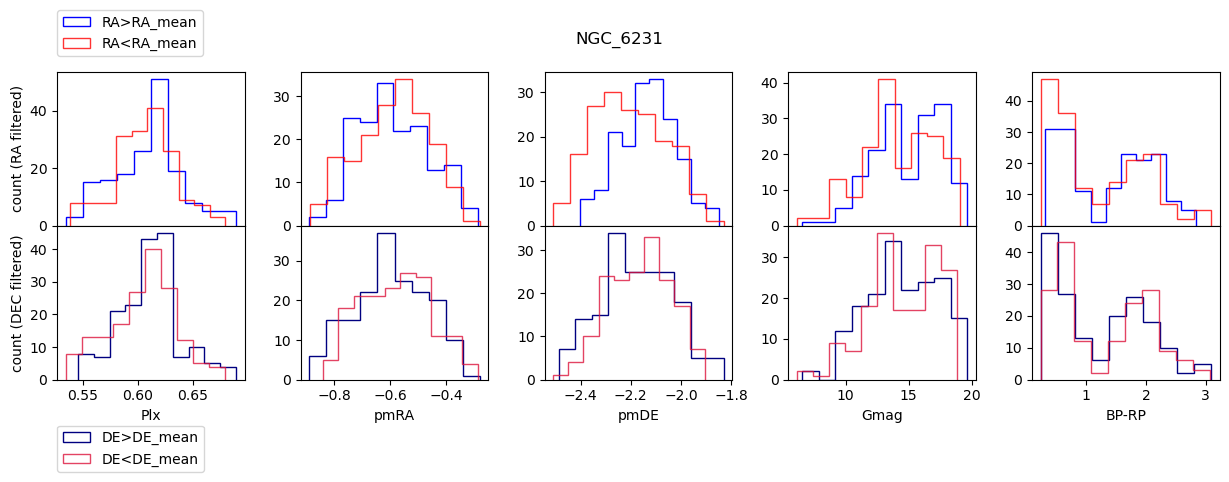

In [31]:
dims=5
fig, axes = plt.subplots(2,5,figsize=(15,4))
fig.subplots_adjust(wspace=0.3,hspace=0)

param = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']


for i in range(dims):
    axes[0,i].hist(my_sc1_RA_more[param[i]],histtype='step',color='blue',label='RA>RA_mean')
    axes[0,i].hist(my_sc1_RA_less[param[i]],histtype='step',color='red',alpha=0.8,label='RA<RA_mean')
    axes[0,0].legend(loc=(0,1.1))

    axes[1,i].hist(my_sc1_DE_more[param[i]],histtype='step',color='navy',label='DE>DE_mean')
    axes[1,i].hist(my_sc1_DE_less[param[i]],histtype='step',color='crimson',alpha=0.8,label='DE<DE_mean')
    axes[1,i].set_xlabel(param[i])
    axes[0,i].set_xticks([])
    axes[1,0].legend(loc=(0,-0.6))

    
axes[0,0].set_ylabel('count (RA filtered)')
axes[1,0].set_ylabel('count (DEC filtered)')
fig.suptitle(sc1)

show()

In [32]:
print('results for the cluster ', sc1)
print()
print(param)
print('-----------------------------------------')
print('* t-test p-values for two samples seperated by mean RA')
print(tt(sc1)[0])
print()
print('* t-test p-values for two samples seperated by mean DE')
print(tt(sc1)[1])
print()
print('the variance differences of two samples of RA')
print(tt(sc1)[2])
print()

print('the variance differences of two samples of DE')
print(tt(sc1)[3])

results for the cluster  NGC_6231

['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
-----------------------------------------
* t-test p-values for two samples seperated by mean RA
[0.5137082495163319, 0.8156253308123942, 3.2526082564363436e-07, 0.010529254533224812, 0.021148297929410587]

* t-test p-values for two samples seperated by mean DE
[0.04762560904905904, 0.20084066271155387, 0.42286639989236485, 0.8207861673024447, 0.4691988772370256]

the variance differences of two samples of RA
[0.00017532300283829981, 0.0004540526809457962, 0.007471384368412147, 1.1326547687029649, 0.03909516370696642]

the variance differences of two samples of DE
[0.00017994536485353653, 0.0013342637106470486, 0.005174850605172251, 0.06286803266911889, 0.013827181104499098]


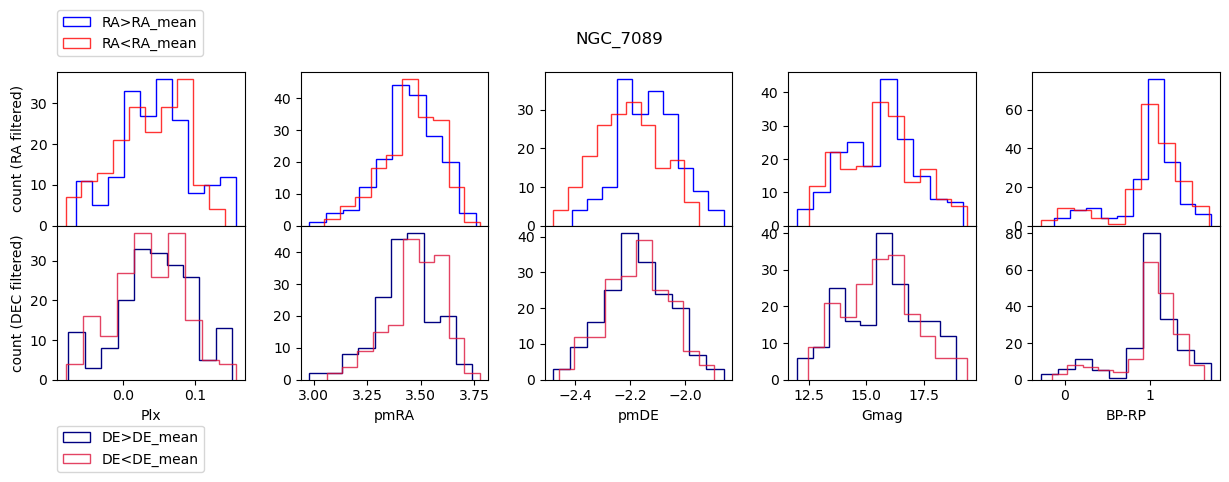

In [43]:
dims=5
fig, axes = plt.subplots(2,5,figsize=(15,4))
fig.subplots_adjust(wspace=0.3,hspace=0)

param = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']


for i in range(dims):
    axes[0,i].hist(my_sc2_RA_more[param[i]],histtype='step',color='blue',label='RA>RA_mean')
    axes[0,i].hist(my_sc2_RA_less[param[i]],histtype='step',color='red',alpha=0.8,label='RA<RA_mean')
    axes[0,0].legend(loc=(0,1.1))

    axes[1,i].hist(my_sc2_DE_more[param[i]],histtype='step',color='navy',label='DE>DE_mean')
    axes[1,i].hist(my_sc2_DE_less[param[i]],histtype='step',color='crimson',alpha=0.8,label='DE<DE_mean')
    axes[1,i].set_xlabel(param[i])
    axes[0,i].set_xticks([])
    axes[1,0].legend(loc=(0,-0.6))

    
axes[0,0].set_ylabel('count (RA filtered)')
axes[1,0].set_ylabel('count (DEC filtered)')
fig.suptitle(sc2)

show()

In [34]:
print('results for the cluster ', sc2)
print()
print(param)
print('-----------------------------------------')
print('* t-test p-values for two samples seperated by mean RA')
print(tt(sc2)[0])
print()
print('* t-test p-values for two samples seperated by mean DE')
print(tt(sc2)[1])
print()
print('the variance differences of two samples of RA')
print(tt(sc2)[2])
print()

print('the variance differences of two samples of DE')
print(tt(sc2)[3])

results for the cluster  NGC_7089

['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
-----------------------------------------
* t-test p-values for two samples seperated by mean RA
[0.038382325481434755, 0.3425505566423257, 6.664841383133043e-10, 0.8629981818550433, 0.8873386858570378]

* t-test p-values for two samples seperated by mean DE
[0.04906658759638333, 0.0001435236122082353, 0.9953266556002086, 0.5341711156132221, 0.5293305972625104]

the variance differences of two samples of RA
[1.374774437849953e-06, 0.0003556194815129837, 0.0024793394724967645, 0.2951432110942891, 0.03391954457346763]

the variance differences of two samples of DE
[0.0003145508930041574, 0.0017014435702126691, 0.0012459188352750023, 0.307056019204873, 0.01817915326742886]


### these two analysis of two additional clusters also protrays that why the t-test is appropriate test for all two independent samples; for example, by looking at the BP-RP parameter of the cluster 'NGC_6231', we can clearly see that this is not uniformly distributed, and considering a low data samples, we cannot conclude that the mean is normally distributed so we cannot rely on the t-test result, the same holds for NGC_7089, where there is a clear skew to the right on both subsamples. 

### Question 3. P-values of t-tests for all the remaining clusters

In [35]:
def grand(param):
    '''calculates and stores the p-value of the t-tests given a any of the five parameters:
       Plx,pmRA,pmDE,Gmag,BR-BP
       it returns two list of p-values of two independant sample t-test, where tt_RA is the p-values
       stored as a result of the t-test on two subsamples produced by spliting the stars by RAmean, and 
       tt_DE is the ones that were splitted by DEmean'''
    
    tt_RA = []
    tt_DE = []
    

    for name in new_cluster.Name:
    
        RAmean = stars_hiprob[stars_hiprob['Name']==name].RAdeg.mean()
        DEmean = stars_hiprob[stars_hiprob['Name']==name].DEdeg.mean()
    
        my_cluster_RA_more = stars_hiprob[(stars_hiprob['Name']==name) & (stars_hiprob['RAdeg']>RAmean)]
        my_cluster_RA_less = stars_hiprob[(stars_hiprob['Name']==name) & (stars_hiprob['RAdeg']<RAmean)]
        my_cluster_DE_more = stars_hiprob[(stars_hiprob['Name']==name) & (stars_hiprob['DEdeg']>DEmean)]
        my_cluster_DE_less = stars_hiprob[(stars_hiprob['Name']==name) & (stars_hiprob['DEdeg']<DEmean)]
        
        a = my_cluster_RA_more[param]
        b = my_cluster_RA_less[param]
        c = my_cluster_DE_more[param]
        d = my_cluster_DE_less[param]
    

        ttra = scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None,
                      random_state=None, alternative='two-sided', trim=0, keepdims=False)[1]
        tt_RA.append(ttra)
    
        ttde = scipy.stats.ttest_ind(c, d, axis=0, equal_var=True, nan_policy='propagate', permutations=None,
                      random_state=None, alternative='two-sided', trim=0, keepdims=False)[1]
        tt_DE.append(ttde)
        
    return tt_RA,tt_DE
    
    
    
    

In [36]:
Plx  = grand('Plx')
pmRA = grand('pmRA')
pmDE = grand('pmDE')
Gmag = grand('Gmag')
BPRP = grand('BP-RP')

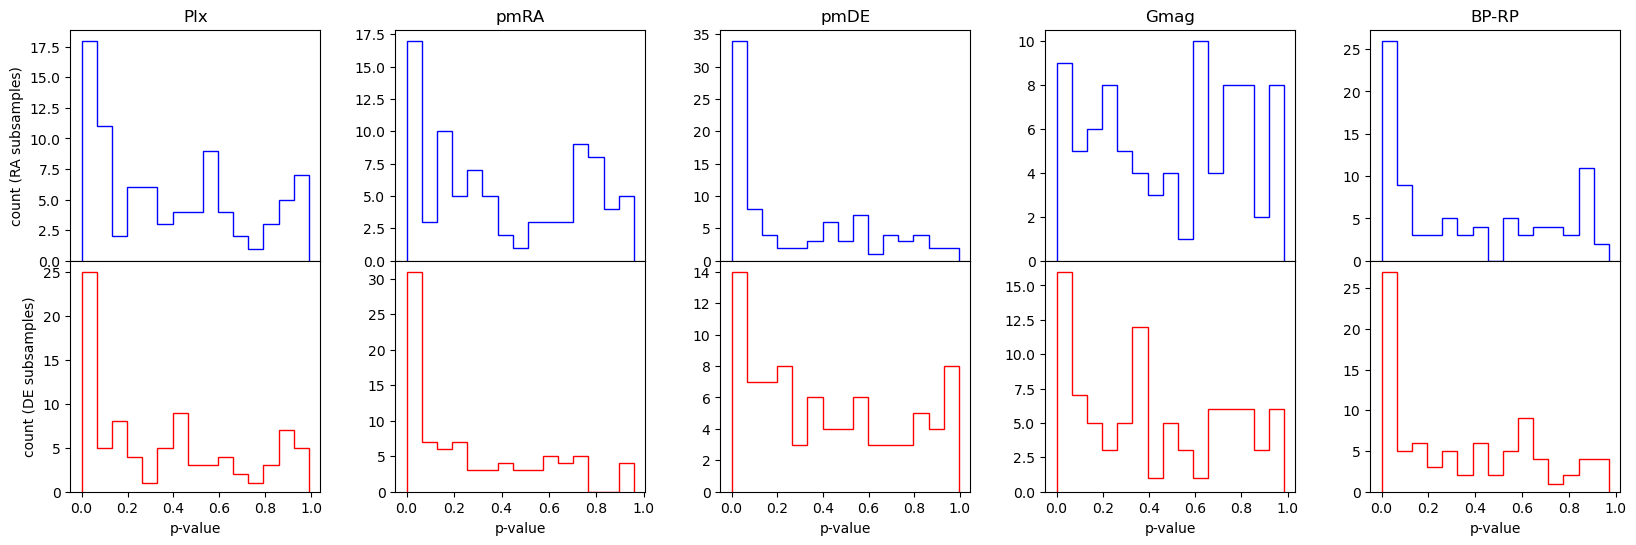

In [37]:
dims=5
fig, axes = plt.subplots(2,5,figsize=(20,6))
fig.subplots_adjust(wspace=0.3,hspace=0)

param = [Plx, pmRA, pmDE, Gmag, BPRP]
lab = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
nbins=15
for i in range(dims):

    axes[0,i].hist(param[i][0],bins=nbins,histtype='step',color='blue')
    axes[0,i].set_xticks([])

    
    axes[1,i].hist(param[i][1],bins=nbins,histtype='step',color='red')
    axes[0,i].set_title(lab[i])
    axes[1,i].set_xlabel('p-value')
    #axes[1,i].legend()

    
axes[0,0].set_ylabel('count (RA subsamples)')
axes[1,0].set_ylabel('count (DE subsamples)')

show()

### apart from the Gmag, all other parameters have displayed a histogram that is weighted on the low values of the p-value, hinting towards the idea that the p-values are not drawn from a unifrom distribution ~U(0,1). We know that if the null hypothesis holds, the p-values must be uniformly distributed but now that we look at our histograms, we see that they are not. If we are hasty we might think that our results are significant, and conclude that a certain parameter with a non-uniform looking histogram could be spetially dependant, rejecting the null hypothesis. However, we should be wary of the outliers in the large data samples as suggested by the assignment that might affect the t-test result signigicantly. In order to have more robust conclusion, we should take an extra step to prevent mis-interpratation so we use K-S test. The K-S test takes our distribution, and compares its CDF with the unifrom theoritical CDF and tells us how far away we are from the distribution. So the null hypothesis of K-S is: The t-test p-values are drawn from a uniform distribution

### Question 4. Performing K-S tests

### As already explain, here I perform the K-S test twice: once, I apply the test on the whole p-value populations of each parameter of the clusters, second, I filter the p-values smaller than 0.01, and apply the K-S test again. The K-S test is checking how different the CDF of the p-value populations are from the CDF of the uniform distribution by producing a p-value. 

In [38]:
cdf = 'uniform'                          #setting the CDF for the K-S test
param = [Plx, pmRA, pmDE, Gmag, BPRP]
lab = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

for i in range(len(param)):
    vars()[lab[i]+'_RA'+'_ks'] = scipy.stats.kstest(param[i][0], cdf)
    vars()[lab[i]+'_DE'+'_ks'] = scipy.stats.kstest(param[i][1], cdf)

    


In [39]:
print('KS test p-value results')
print()
print('subsamples based on RA')
print()
for i in range(len(param)):
    
    if vars()[lab[i]+'_RA'+'_ks'][1] < 0.00269979606:              #setting the three sigma threshold
        print(lab[i] + ': p-value =',vars()[lab[i]+'_RA'+'_ks'][1])
        print(r'Attention!! ~U(0,1) is rejected; more than 3sigma significance')
        print()
    else:
        print(lab[i] + ': p-value =',vars()[lab[i]+'_RA'+'_ks'][1])
        print(r'~U(0,1) is not rejected; less than 3sigma significance')
        print()
        
        
print('----------------------------------------')
print('subsamples based on DE')
print()
for i in range(len(param)):
        
    if vars()[lab[i]+'_DE'+'_ks'][1] < 0.00269979606:                  #setting the three sigma threshold
        print(lab[i] + ': p-value =',vars()[lab[i]+'_DE'+'_ks'][1])
        print(r'Attention!!~U(0,1) is rejected;; more than 3sigma significance')
        print()
    else:
        print(lab[i] + ': p-value =',vars()[lab[i]+'_DE'+'_ks'][1])
        print(r'~U(0,1) is not rejected; less than 3sigma significance')
        print()
        
        

KS test p-value results

subsamples based on RA

Plx: p-value = 0.0006479816421020702
Attention!! ~U(0,1) is rejected; more than 3sigma significance

pmRA: p-value = 0.009607807299988662
~U(0,1) is not rejected; less than 3sigma significance

pmDE: p-value = 1.9612282989087924e-11
Attention!! ~U(0,1) is rejected; more than 3sigma significance

Gmag: p-value = 0.5376667114880909
~U(0,1) is not rejected; less than 3sigma significance

BP-RP: p-value = 7.359708852055603e-07
Attention!! ~U(0,1) is rejected; more than 3sigma significance

----------------------------------------
subsamples based on DE

Plx: p-value = 1.086810267139592e-05
Attention!!~U(0,1) is rejected;; more than 3sigma significance

pmRA: p-value = 1.0133265491665592e-10
Attention!!~U(0,1) is rejected;; more than 3sigma significance

pmDE: p-value = 0.017177906273510735
~U(0,1) is not rejected; less than 3sigma significance

Gmag: p-value = 0.0025758818271619647
Attention!!~U(0,1) is rejected;; more than 3sigma significan

### looking at the above p-values of the KS test, we can be certain in most cases that the null hypothesis, that is the our t-test p-values are drawn from a unifrom distribution, can be rejected (7 out of 10 tests have reject the uniformity by more than $3\sigma$ significance). This is ofcourse not a surprise to us as we could already see in our histogram in part 3, that there are many spikes of counts in certain p-values which does not resemble the uniform shape. In addition, the G-mag in RA subsamples however, has produced a relatively large p-value that does not reject the hypothesis, this is also to be expected as G-mag histogram has shape that is more similar to uniform than the others. However, as suggested by the assignment, we have to be wary of outliers that apear significant in a test, eventhough the null hypothesis is true. We can see that the spike of the histogram is taking place mostly in a very low p-values, so it would be interesting to see that what happens if we only include the p-values that are larger than 0.01: ###

In [40]:
param = [np.asarray(Plx), np.asarray(pmRA), np.asarray(pmDE), np.asarray(Gmag), np.asarray(BPRP)]

for i in range(len(param)):
    print(f'the % population of the p-values of {lab[i]} < 0.01 subsampled by RAmean'
          + ':  ' + '{:.2f} %'.format(100*len(param[i][0][param[i][0]<0.01])/len(param[i][0])))
print("===========================================================")
for i in range(len(param)):
    
    print(f'the % population of the p-values of {lab[i]} < 0.01 subsampled by DEmean'
          + ':  '+ '{:.2f} %'.format(100*len(param[i][1][param[i][1]<0.01])/len(param[i][1])))

the % population of the p-values of Plx < 0.01 subsampled by RAmean:  9.41 %
the % population of the p-values of pmRA < 0.01 subsampled by RAmean:  9.41 %
the % population of the p-values of pmDE < 0.01 subsampled by RAmean:  23.53 %
the % population of the p-values of Gmag < 0.01 subsampled by RAmean:  1.18 %
the % population of the p-values of BP-RP < 0.01 subsampled by RAmean:  17.65 %
the % population of the p-values of Plx < 0.01 subsampled by DEmean:  9.41 %
the % population of the p-values of pmRA < 0.01 subsampled by DEmean:  23.53 %
the % population of the p-values of pmDE < 0.01 subsampled by DEmean:  3.53 %
the % population of the p-values of Gmag < 0.01 subsampled by DEmean:  5.88 %
the % population of the p-values of BP-RP < 0.01 subsampled by DEmean:  20.00 %


In [41]:
cdf = 'uniform'
param = [np.asarray(Plx), np.asarray(pmRA), np.asarray(pmDE), np.asarray(Gmag), np.asarray(BPRP)]
lab = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

for i in range(len(param)):
    vars()[lab[i]+'_RA'+'_ks_f'] = scipy.stats.kstest(param[i][0][param[i][0]>0.01], cdf)
    vars()[lab[i]+'_DE'+'_ks_f'] = scipy.stats.kstest(param[i][1][param[i][1]>0.01], cdf)

    


In [42]:
print('KS test p-value results after we removed p < 0.01')
print()
print('subsamples based on RA')
print()
for i in range(len(param)):
    
    if vars()[lab[i]+'_RA'+'_ks_f'][1] < 0.00269979606:              #setting the three sigma threshold
        print(lab[i] + ': p-value =',vars()[lab[i]+'_RA'+'_ks_f'][1])
        print(r'Attention!! ~U(0,1) is rejected; more than 3sigma significance')
        print()
    else:
        print(lab[i] + ': p-value =',vars()[lab[i]+'_RA'+'_ks_f'][1])
        print(r'~U(0,1) is not rejected; less than 3sigma significance')
        print()
        
        
print('----------------------------------------')
print('subsamples based on DE')
print()
for i in range(len(param)):
        
    if vars()[lab[i]+'_DE'+'_ks_f'][1] < 0.00269979606:                  #setting the three sigma threshold
        print(lab[i] + ': p-value =',vars()[lab[i]+'_DE'+'_ks_f'][1])
        print(r'Attention!!~U(0,1) is rejected;; more than 3sigma significance')
        print()
    else:
        print(lab[i] + ': p-value =',vars()[lab[i]+'_DE'+'_ks_f'][1])
        print(r'~U(0,1) is not rejected; less than 3sigma significance')
        print()
        
        

KS test p-value results after we removed p < 0.01

subsamples based on RA

Plx: p-value = 0.07105630029634201
~U(0,1) is not rejected; less than 3sigma significance

pmRA: p-value = 0.1837237740070412
~U(0,1) is not rejected; less than 3sigma significance

pmDE: p-value = 0.0011387106637212874
Attention!! ~U(0,1) is rejected; more than 3sigma significance

Gmag: p-value = 0.5284383426851436
~U(0,1) is not rejected; less than 3sigma significance

BP-RP: p-value = 0.050159524917066496
~U(0,1) is not rejected; less than 3sigma significance

----------------------------------------
subsamples based on DE

Plx: p-value = 0.0026405898626094032
Attention!!~U(0,1) is rejected;; more than 3sigma significance

pmRA: p-value = 0.00048449165057232765
Attention!!~U(0,1) is rejected;; more than 3sigma significance

pmDE: p-value = 0.05908465374186087
~U(0,1) is not rejected; less than 3sigma significance

Gmag: p-value = 0.020726876312336735
~U(0,1) is not rejected; less than 3sigma significance

BP

### As we applied the filtering on our p-values, we have recieved a reversed scenario compared to before. This time only 3 out of 10 tests rejected the uniformity of the distribution, and they are 1) pmDE in RA subsamples, 2)Plx and 3) pmRA in DE subsamples; these parameters were also rejected the uniformity hypthosis before filtering.  This means that these three parameters are likely spatially dependant, and we can reject our suspicion that they were significant due to outlier; this particularly true for pmDE(RA) and pmRA(DE) since we removed a large part of their data points (~24% of population) before the second K-S test, yet we still could reject the uniformity of the distribution by more than $3\sigma$ significance.